In [10]:
import torch
import sklearn
from sklearn import datasets, cluster
import matplotlib.pyplot as plt

from KMeans import KMeans
import Metrics

In [11]:
X, y = sklearn.datasets.make_blobs(n_samples=10000, n_features=2, centers=20, cluster_std=0.4)
X = torch.tensor(X)

My KMeans (Mahalanobis)

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
n_clusters = 20

In [13]:
metric_kmeans = Metrics.MahalanobisMetric(shrinkage=1, gamma_1=1, gamma_2=1, normalization=True)
kmeans = KMeans(n_clusters=n_clusters, metric=metric_kmeans)
kmeans.metric_preprocess(X.reshape(1, -1, 2).to(device))
centroids1 = (kmeans.fit_predict(X.to(device).unsqueeze(0)).cpu().numpy()).squeeze(0)

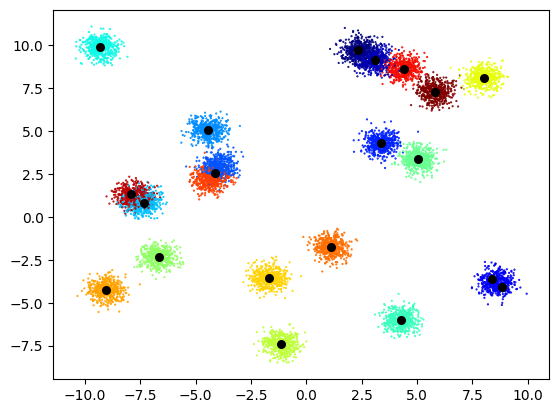

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=0.3, cmap='jet')
plt.scatter(centroids1[:, 0], centroids1[:, 1], s=30, c='black')
plt.show()

My KMeans

In [15]:
centroids1 = (KMeans(n_clusters).fit_predict(X.to(device).unsqueeze(0)).cpu().numpy()).squeeze(0)

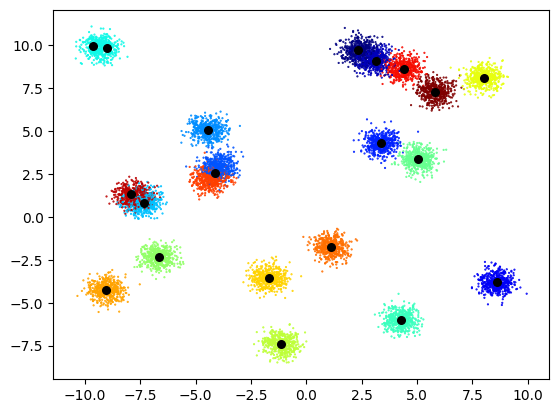

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=0.3, cmap='jet')
plt.scatter(centroids1[:, 0], centroids1[:, 1], s=30, c='black')
plt.show()

Sklearn KMeans

In [17]:
centroids2 = (sklearn.cluster.KMeans(n_clusters).fit(X).cluster_centers_)

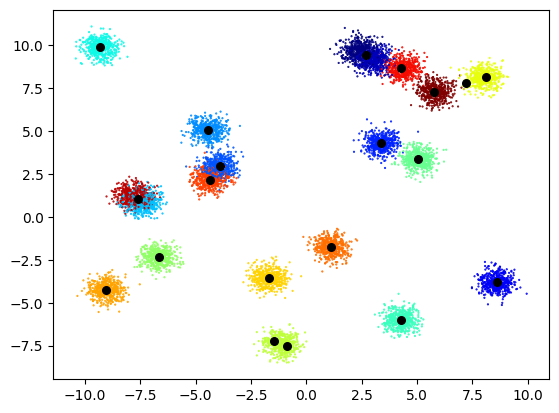

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=0.3, cmap='jet')
plt.scatter(centroids2[:, 0], centroids2[:, 1], s=30, c='black')
plt.show()